# IRP DATA PROCESSING PROGRAM
#### Author: Ramir Angeles SUTD MUSPP 1005709
This is the program I produced for my Individual Research Project (IRP) for data processing pre- and post-GIS processing, which was performed in ArcGIS. 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.close_figures=False

In [2]:
df = pd.read_csv("RUN2_ACTIVITY_DATA_FINAL.csv")
df.tail()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute
3648,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",44.04km\nDistance\n1:39:12\nMoving Time\n497m\...,0
3649,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",85.68km\nDistance\n2:41:32\nMoving Time\n938m\...,0
3650,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",46.28km\nDistance\n1:31:37\nMoving Time\n447m\...,0
3651,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",55.08km\nDistance\n2:06:40\nMoving Time\n260m\...,0
3652,3653,502,https://www.strava.com/segment_efforts/2759572...,"Nov 6, 2020",Morning Ride,"Friday, November 6, 2020",22.45km\nDistance\n42:19\nMoving Time\n230m\nE...,0


In [3]:
len(df)

3653

In [9]:
df2 = pd.DataFrame(columns=['segment_ID','link','date'])

n = 0
c = 0
while n < len(df):
    if n%2 == 0:
        df2.at[n,'segment_ID'] = df['segment_ID'][c]
        df2.at[n,'link'] = df['link'][c]
        df2.at[n,'date'] = df['attached_string'][c]
        c = c + 2
    
    n = n + 1

In [12]:
df2.to_csv('final_trip_sample.csv')

## TRIP DATA CLEANING START

In [62]:
df = pd.read_csv("RUN2_ACTIVITY_DATA_FINAL.csv")
df.tail()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute
3648,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",44.04km\nDistance\n1:39:12\nMoving Time\n497m\...,0
3649,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",85.68km\nDistance\n2:41:32\nMoving Time\n938m\...,0
3650,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",46.28km\nDistance\n1:31:37\nMoving Time\n447m\...,0
3651,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",55.08km\nDistance\n2:06:40\nMoving Time\n260m\...,0
3652,3653,502,https://www.strava.com/segment_efforts/2759572...,"Nov 6, 2020",Morning Ride,"Friday, November 6, 2020",22.45km\nDistance\n42:19\nMoving Time\n230m\nE...,0


In [6]:
# Identify duplicate rides, occurs when 1 ride passes through several segments within the sample
dupl = df.duplicated(subset='trip_data', keep='first')
df['duplicate'] = dupl

In [8]:
df['duplicate'].unique()

array([False,  True])

In [9]:
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate
0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,False
1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,False
2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,False
3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,False
4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,False


In [22]:
ndupl_df = df.loc[df['duplicate']==False]
ndupl_df['ID']

0          1
1          2
2          3
3          4
4          5
        ... 
1580    1581
1581    1582
1582    1583
1583    1584
1584    1585
Name: ID, Length: 1505, dtype: int64

In [19]:
dupl_df = df.loc[df['duplicate']==True]
dupl_df['ID']

883      884
884      885
887      888
895      896
904      905
        ... 
1514    1515
1518    1519
1558    1559
1564    1565
1571    1572
Name: ID, Length: 80, dtype: int64

In [21]:
for i in dupl_df['ID']:
    print("'"+str(i)+"'", end =", ")

'884', '885', '888', '896', '905', '912', '914', '921', '929', '930', '936', '956', '963', '974', '996', '1004', '1009', '1014', '1024', '1025', '1028', '1029', '1045', '1052', '1059', '1068', '1075', '1076', '1094', '1101', '1112', '1125', '1130', '1134', '1135', '1137', '1146', '1147', '1165', '1167', '1172', '1174', '1181', '1185', '1198', '1201', '1209', '1222', '1272', '1275', '1278', '1279', '1286', '1292', '1306', '1334', '1346', '1348', '1352', '1356', '1364', '1367', '1371', '1378', '1398', '1401', '1412', '1418', '1432', '1435', '1444', '1456', '1463', '1491', '1508', '1515', '1519', '1559', '1565', '1572', 

In [20]:
dupl_df.head()

,ID,link_ID,segment_ID,link,date,day,age_range,sex,time_data,trip_data,commute,duplicate
883,884,1019,2,https://www.strava.com/segment_efforts/2825757...,"Apr 30, 2021",30,19 and under,Men,"Friday, April 30, 2021",49.17km\nDistance\n2:04:46\nMoving Time\n62m\n...,0,True
884,885,1020,2,https://www.strava.com/segment_efforts/2827766...,"May 13, 2021",13,19 and under,Men,"Thursday, May 13, 2021",86.56km\nDistance\n3:47:23\nMoving Time\n376m\...,0,True
887,888,1023,2,https://www.strava.com/segment_efforts/2829892...,"May 19, 2021",19,19 and under,Men,"Wednesday, May 19, 2021",73.96km\nDistance\n3:02:12\nMoving Time\n131m\...,0,True
895,896,1031,2,https://www.strava.com/segment_efforts/2823773...,"May 2, 2021",2,19 and under,Men,"Sunday, May 2, 2021",67.65km\nDistance\n2:50:58\nMoving Time\n242m\...,0,True
904,905,1041,2,https://www.strava.com/segment_efforts/2825480...,"May 6, 2021",6,20 to 24,Men,"Thursday, May 6, 2021",54.42km\nDistance\n2:00:26\nMoving Time\n210m\...,0,True


In [10]:
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate
0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,False
1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,False
2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,False
3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,False
4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,False


#### Time data processing: cuts time_data string into usable time variables

In [38]:
df['time_data'][0].split(', ')

['Friday', 'February 9', '2018']

In [39]:
int(df['time_data'][0].split(', ')[2])

2018

In [40]:
day_of_week = []
year = []
month_day = []
for data in df['time_data']:
    day_of_week.append(data.split(', ')[0])
    year.append(int(data.split(', ')[2]))
    month_day.append(data.split(', ')[1])
    
df['day_of_week'] = day_of_week
df['year'] = year
df['month_day'] = month_day
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,day_of_week,year,month_day
0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,Friday,2018,February 9
1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,Friday,2017,September 29
2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,Thursday,2017,December 21
3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,Sunday,2019,October 20
4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,Wednesday,2013,December 18


In [19]:
df['date'].str[:3]

0       Feb
1       Sep
2       Dec
3       Oct
4       Dec
       ... 
3648    Sep
3649    Sep
3650    Oct
3651    Sep
3652    Nov
Name: date, Length: 3653, dtype: object

In [20]:
df['month'] = df['date'].str[:3]

In [63]:
dist = []
movetime = []
elev = []
for data in df['trip_data']:
    #distance
    dist.append(float(data.split('\n')[0].split('km')[0]))
    #moving time - not yet in calculable format
    movetime.append(data.split('\n')[2])
    #elev gain
    elev.append(int(data.split('\n')[4].split('m')[0].replace(',','')))
    
df['distance'] = dist
df['moving_time'] = movetime
df['elev_gain'] = elev

In [64]:
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,distance,moving_time,elev_gain
0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,16.11,36:07,111
1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,14.19,34:28,226
2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,42.76,13:32:28,445
3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,17.82,46:23,21
4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,32.47,1:36:35,515


#### Movetime processing

In [46]:
len(df['moving_time'][4])

7

In [65]:
num = []
for t in df['moving_time']:
    num.append(len(t))
        

In [66]:
df['movetime_len'] = num
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,distance,moving_time,elev_gain,movetime_len
0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,16.11,36:07,111,5
1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,14.19,34:28,226,5
2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,42.76,13:32:28,445,8
3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,17.82,46:23,21,5
4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,32.47,1:36:35,515,7


In [67]:
df_time = pd.DataFrame(columns=['ID'])
df_time['ID'] = df['ID']
df_time['moving_time'] = df['moving_time']
df_time['movetime_len'] = df['movetime_len']

In [54]:
#t = df['moving_time'][0]
df['moving_time'].str[3:]

0          07
1          28
2       32:28
3          23
4        6:35
        ...  
3648     9:12
3649     1:32
3650     1:37
3651     6:40
3652       19
Name: moving_time, Length: 3653, dtype: object

In [23]:
df.tail()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,day_of_week,year,month_day,month,distance,moving_time,elev_gain
3648,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",44.04km\nDistance\n1:39:12\nMoving Time\n497m\...,0,False,Thursday,2020,September 10,Sep,44.04,1:39:12,497
3649,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",85.68km\nDistance\n2:41:32\nMoving Time\n938m\...,0,False,Saturday,2020,September 19,Sep,85.68,2:41:32,938
3650,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",46.28km\nDistance\n1:31:37\nMoving Time\n447m\...,0,False,Tuesday,2020,October 27,Oct,46.28,1:31:37,447
3651,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",55.08km\nDistance\n2:06:40\nMoving Time\n260m\...,0,False,Wednesday,2020,September 9,Sep,55.08,2:06:40,260
3652,3653,502,https://www.strava.com/segment_efforts/2759572...,"Nov 6, 2020",Morning Ride,"Friday, November 6, 2020",22.45km\nDistance\n42:19\nMoving Time\n230m\nE...,0,False,Friday,2020,November 6,Nov,22.45,42:19,230


In [26]:
df = pd.read_csv("RUN2_activity_data_cleaned1.csv")
df.tail()

,Unnamed: 0,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,day_of_week,year,month_day,month,distance,moving_time,elev_gain,day_unfin
3648,3648,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",44.04km\nDistance\n1:39:12\nMoving Time\n497m\...,0,False,Thursday,2020,Sep-10,Sep,44.04,1:39:12,497,10
3649,3649,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",85.68km\nDistance\n2:41:32\nMoving Time\n938m\...,0,False,Saturday,2020,Sep-19,Sep,85.68,2:41:32,938,19
3650,3650,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",46.28km\nDistance\n1:31:37\nMoving Time\n447m\...,0,False,Tuesday,2020,Oct-27,Oct,46.28,1:31:37,447,27
3651,3651,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",55.08km\nDistance\n2:06:40\nMoving Time\n260m\...,0,False,Wednesday,2020,Sep-09,Sep,55.08,2:06:40,260,"9,"
3652,3652,3653,502,https://www.strava.com/segment_efforts/2759572...,"Nov 6, 2020",Morning Ride,"Friday, November 6, 2020",22.45km\nDistance\n42:19\nMoving Time\n230m\nE...,0,False,Friday,2020,Nov-06,Nov,22.45,42:19:00,230,"6,"


In [28]:
day = []
for data in df['day_unfin']:
    day.append(int(data.replace(',','')))
    
df['day_of_month'] = day
df.head()

,Unnamed: 0,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,day_of_week,year,month_day,month,distance,moving_time,elev_gain,day_unfin,day_of_month
0,0,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\nDistance\n36:07\nMoving Time\n111m\nE...,0,False,Friday,2018,Feb-09,Feb,16.11,36:07:00,111,"9,",9
1,1,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\nDistance\n34:28\nMoving Time\n226m\nE...,0,False,Friday,2017,Sep-29,Sep,14.19,34:28:00,226,29,29
2,2,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\nDistance\n13:32:28\nMoving Time\n445m...,0,False,Thursday,2017,Dec-21,Dec,42.76,13:32:28,445,21,21
3,3,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\nDistance\n46:23\nMoving Time\n21m\nEl...,0,False,Sunday,2019,Oct-20,Oct,17.82,46:23:00,21,20,20
4,4,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\nDistance\n1:36:35\nMoving Time\n515m\...,0,False,Wednesday,2013,Dec-18,Dec,32.47,1:36:35,515,18,18


In [29]:
df.to_csv('RUN2_activity_data_cleaned2.csv')

In [33]:
df.groupby('duplicate').count()

,Unnamed: 0,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,day_of_week,year,month_day,month,distance,moving_time,elev_gain,day_unfin,day_of_month
duplicate,,,,,,,,,,,,,,,,,,
False,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528,3528
True,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125


#### Code snippet testing for ArcGIS Python

In [8]:
i = 1
gpx_paths = []
while i <= 1585: gpx_paths.append("C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX\\"+str(i)+".gpx"); i=i+1

In [10]:
gpx_pt = []
j = 1
while j <= 1585: gpx_pt.append("C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_pt\\"+str(j)+".shp"); j=j+1

In [12]:
gpx_line = []
k = 1
while k <= 1585: gpx_line.append("C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\"+str(k)+".shp"); k=k+1

In [14]:
sample = str(1)+"_pt"
sample

'1_pt'

In [ ]:
while i<=3653: arcpy.GPXtoFeatures_conversion("C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX\\"+str(i)+".gpx", "C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_pt\\"+str(i)+"_pt.shp"); i=i+1

while i<=1585: arcpy.GPXtoFeatures_conversion("C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX\\"+str(i)+".gpx", "C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_pt\\"+str(i)+"_pt.shp"); i=i+1
j = 1
while j<=1585: arcpy.PointsToLine_management(str(j)+"_pt", "C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\"+str(j)+".shp"); j=j+1

In [13]:
gpx_line

['C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\1.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\2.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\3.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\4.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\5.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\6.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\7.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\8.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\9.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\10.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\11.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\12.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\13.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\14.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\15.shp',
 'C:\\Users\\asus\\Documents\\ArcGIS\\IRP\\GPX_line\\16.shp',
 'C:\\Users\\asus

## Post-GIS processing
#### distance error (GPS)
distance error is due to jumping GPS data (error from GPS receiver) and calculated by comparing GIS-measured line data to declared distance data in the activity.

In [6]:
df = pd.read_csv("strava_merge_data.csv")
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,day_of_month,distance,moving_time,elev_gain,Shape_Length,Length_KM,ID_1,commute_keywords,commute_sport,dist_error
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,9,16.11,36:07:00,111,16075.22732,16.075227,1,0,NaN,0.215845
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,29,14.19,34:28:00,226,14208.33897,14.208339,2,0,NaN,0.129239
2,3,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\r\nDistance\r\n13:32:28\r\nMoving Time...,0,False,...,21,42.76,13:32:28,445,42875.37490,42.875375,3,0,NaN,0.269820
3,4,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\r\nDistance\r\n46:23\r\nMoving Time\r\...,0,False,...,20,17.82,46:23:00,21,17488.33153,17.488332,4,0,NaN,1.861215
4,5,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\r\nDistance\r\n1:36:35\r\nMoving Time\...,0,False,...,18,32.47,1:36:35,515,32044.44819,32.044448,5,0,NaN,1.310600


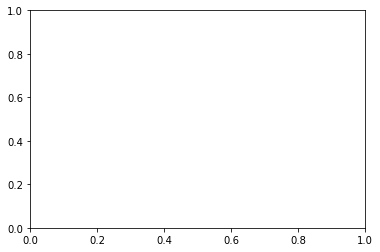

In [7]:
fig, ax = plt.subplots(1,1)

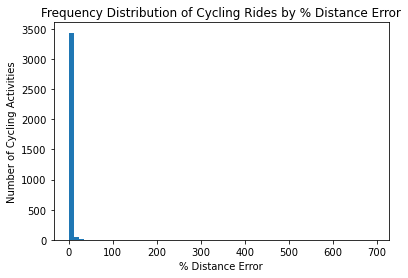

In [8]:

dist_error = np.array(df['dist_error'])

plt.hist(dist_error, 60)
plt.title('Frequency Distribution of Cycling Rides by % Distance Error')
plt.xlabel('% Distance Error')
plt.ylabel('Number of Cycling Activities')
fig

In [10]:
df['dist_error'].describe()

count    3516.000000
mean        2.107672
std        15.945883
min         0.000073
25%         0.208837
50%         0.388759
75%         1.205922
max       691.748508
Name: dist_error, dtype: float64

#### Moving time analysis

In [68]:
df = pd.read_csv('strava_merge_data.csv')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,month,day_of_month,distance,moving_time,elev_gain,Shape_Length,Length_KM,ID_1,commute_keywords,commute_sport
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,Feb,9,16.11,36:07:00,111,16075.227323,16.075227,1,0,NaN
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,Sep,29,14.19,34:28:00,226,14208.338967,14.208339,2,0,NaN
2,3,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\r\nDistance\r\n13:32:28\r\nMoving Time...,0,False,...,Dec,21,42.76,13:32:28,445,42875.374905,42.875375,3,0,NaN
3,4,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\r\nDistance\r\n46:23\r\nMoving Time\r\...,0,False,...,Oct,20,17.82,46:23:00,21,17488.331529,17.488332,4,0,NaN
4,5,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\r\nDistance\r\n1:36:35\r\nMoving Time\...,0,False,...,Dec,18,32.47,1:36:35,515,32044.448192,32.044448,5,0,NaN


In [69]:
len(df)

3516

In [70]:
df = pd.merge(df, df_time, on='ID', how='left')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,distance,moving_time_x,elev_gain,Shape_Length,Length_KM,ID_1,commute_keywords,commute_sport,moving_time_y,movetime_len
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,16.11,36:07:00,111,16075.227323,16.075227,1,0,NaN,36:07,5
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,14.19,34:28:00,226,14208.338967,14.208339,2,0,NaN,34:28,5
2,3,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\r\nDistance\r\n13:32:28\r\nMoving Time...,0,False,...,42.76,13:32:28,445,42875.374905,42.875375,3,0,NaN,13:32:28,8
3,4,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\r\nDistance\r\n46:23\r\nMoving Time\r\...,0,False,...,17.82,46:23:00,21,17488.331529,17.488332,4,0,NaN,46:23,5
4,5,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\r\nDistance\r\n1:36:35\r\nMoving Time\...,0,False,...,32.47,1:36:35,515,32044.448192,32.044448,5,0,NaN,1:36:35,7


In [115]:
len(df)

3516

In [116]:
h=[]
m=[]
s=[]
for t in df['moving_time_y']:
    if len(t) == 4:
        h.append(0)
        m.append(t[0])
        s.append(t[2:])
    elif len(t) == 5:
        h.append(0)
        m.append(t[:2])
        s.append(t[3:])  
    elif len(t) == 7:
        h.append(t[0])
        m.append(t[2:4])
        s.append(t[5:])
    elif len(t) == 8:
        h.append(t[:2])
        m.append(t[3:5])
        s.append(t[6:])
    else:
        h.append(0)
        m.append(0)
        s.append(0)

#h    

In [117]:
len(h)

3516

In [124]:
df['t_hour']=h
df['t_min']=m
df['t_sec']=s

AttributeError: 'list' object has no attribute 'astype'

In [120]:
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,Shape_Length,Length_KM,ID_1,commute_keywords,commute_sport,moving_time_y,movetime_len,t_hour,t_min,t_sec
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,16075.227323,16.075227,1,0,NaN,36:07,5,0,36,07
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,14208.338967,14.208339,2,0,NaN,34:28,5,0,34,28
2,3,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",42.76km\r\nDistance\r\n13:32:28\r\nMoving Time...,0,False,...,42875.374905,42.875375,3,0,NaN,13:32:28,8,13,32,28
3,4,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",17.82km\r\nDistance\r\n46:23\r\nMoving Time\r\...,0,False,...,17488.331529,17.488332,4,0,NaN,46:23,5,0,46,23
4,5,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",32.47km\r\nDistance\r\n1:36:35\r\nMoving Time\...,0,False,...,32044.448192,32.044448,5,0,NaN,1:36:35,7,1,36,35


In [122]:
df['movetime_hr'] = df['t_hour']+(df['t_min']/60)+(df['t_sec']/3600)

TypeError: cannot convert the series to <class 'int'>

In [108]:
df['moving_time_y'][2][6:]

'28'

In [125]:
df.to_csv('strava_merge_time_processing.csv')

In [25]:
df = pd.read_csv('strava_corr_dist_1p.csv')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,Length_KM,commute_keywords_csv_ID,commute_keywords,commute_sport,ID_1,dist_error,Shape_Length,ID_12,time_hr,ave_speed
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,16.075227,1,0,NaN,1,0.215845,16075.227323,1,0.601944,26.705500
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,14.208339,2,0,NaN,2,0.129239,14208.338967,2,0.574444,24.734052
2,4,6,1,https://www.strava.com/segment_efforts/5859035114,"Jan 20, 2015",Johor Bahru Cycling,"Tuesday, January 20, 2015",19.55km\r\nDistance\r\n47:53\r\nMoving Time\r\...,0,False,...,19.724203,6,0,NaN,6,0.891063,19724.202789,6,0.798056,24.715325
3,5,7,1,https://www.strava.com/segment_efforts/3606173...,"Mar 9, 2018",Afternoon Ride,"Friday, March 9, 2018",18.61km\r\nDistance\r\n57:36\r\nMoving Time\r\...,0,False,...,18.557019,7,0,NaN,7,0.284692,18557.018771,7,0.960000,19.330228
4,6,8,1,https://www.strava.com/segment_efforts/3055387...,"Oct 19, 2017",Spinning Before Fun ride at Kukop!!,"Thursday, October 19, 2017",15.80km\r\nDistance\r\n39:01\r\nMoving Time\r\...,0,False,...,15.761135,8,0,NaN,8,0.245978,15761.135468,8,0.650278,24.237543


In [26]:
len(df)

2490

In [38]:
df['Length_KM'].describe()

count    2490.000000
mean       57.646567
std        39.375205
min         0.497986
25%        28.686797
50%        49.745177
75%        77.550505
max       301.769103
Name: Length_KM, dtype: float64

In [39]:
df['time_hr'].describe()

count    2490.000000
mean        2.092209
std         1.344557
min         0.024444
25%         1.118472
50%         1.821250
75%         2.816319
max         9.140000
Name: time_hr, dtype: float64

In [40]:
df['ave_speed'].describe()

count    2490.000000
mean       27.925276
std         7.630918
min         2.756362
25%        23.067096
50%        28.933694
75%        33.006996
max        60.019062
Name: ave_speed, dtype: float64

## Plotting

In [10]:
df = pd.read_csv('RUN2_activity_data_cleaned2_monthsort.csv')
df.head()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,commute_sport,duplicate,day_of_week,year,month,day_of_month,distance,moving_time,elev_gain
0,6,1,https://www.strava.com/segment_efforts/5859035114,"Jan 20, 2015",Johor Bahru Cycling,"Tuesday, January 20, 2015",19.55km\nDistance\n47:53\nMoving Time\n45m\nEl...,0,NaN,False,Tuesday,2015,Jan,20,19.55,47:53:00,45
1,16,4,https://www.strava.com/segment_efforts/1744062...,"Jan 9, 2011","01/09/2011 Singapore, Singapore","Sunday, January 9, 2011",53.05km\nDistance\n1:36:40\nMoving Time\n137m\...,0,NaN,False,Sunday,2011,Jan,9,53.05,1:36:40,137
2,28,5,https://www.strava.com/segment_efforts/1584818...,"Jan 20, 2016",SG East Loop,"Wednesday, January 20, 2016",77.61km\nDistance\n3:24:27\nMoving Time\n492m\...,0,NaN,False,Wednesday,2016,Jan,20,77.61,3:24:27,492
3,36,6,https://www.strava.com/segment_efforts/7479654...,"Jan 16, 2020",Morning Ride,"Thursday, January 16, 2020",50.09km\nDistance\n1:20:11\nMoving Time\n217m\...,0,NaN,False,Thursday,2020,Jan,16,50.09,1:20:11,217
4,83,12,https://www.strava.com/segment_efforts/5310114...,"Jan 27, 2019",Morning Ride,"Sunday, January 27, 2019",15.25km\nDistance\n1:29:07\nMoving Time\n277m\...,0,NaN,False,Sunday,2019,Jan,27,15.25,1:29:07,277


### Sort by month for possible seasonal variations

In [15]:
df['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

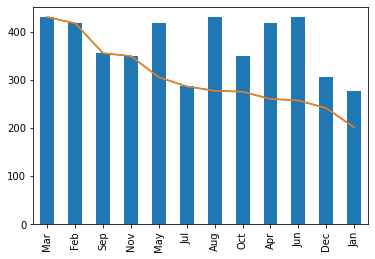

In [16]:
fig = df['month'].value_counts(sort=False, ascending=False).plot(kind='bar')

### Land Use

In [73]:
df1=pd.read_csv('origin_landuse.csv')
df1.head()

,OBJECTID,FID_strava_origin_points,mem_point_LineOID,mem_point_Value,STRAVA_MERGE3_OBJECTID,STRAVA_MERGE3_ID,STRAVA_MERGE3_segment_ID,STRAVA_MERGE3_link,STRAVA_MERGE3_date,STRAVA_MERGE3_activity_title,...,LU_DESC,LU_TEXT,GPR,WHI_Q_MX,GPR_B_MN,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng
0,1,3490,3490,0.0,3490,3626,498,https://www.strava.com/segment_efforts/2726012...,"Aug 5, 2020",Afternoon 30k ride round Sentosa,...,ROAD,,,0.0,0.0,AC23D86E80008EF1,23/06/2014 0:00:00,28287.3664,24972.6901,4149.884156
1,2,3296,3296,0.0,3296,3421,470,https://www.strava.com/segment_efforts/2703877...,"Apr 29, 2020",Morning Ride,...,ROAD,,,0.0,0.0,AC23D86E80008EF1,23/06/2014 0:00:00,28287.3664,24972.6901,4149.884156
2,3,483,483,0.0,483,492,70,https://www.strava.com/segment_efforts/2765050...,"Nov 21, 2020",Morning Ride,...,ROAD,,,0.0,0.0,DECF7B30CE5EDD06,23/06/2014 0:00:00,28597.6215,24923.9797,2067.065210
3,4,691,691,0.0,691,700,100,https://www.strava.com/segment_efforts/2073131...,"Dec 15, 2015",Lunch Ride,...,RESIDENTIAL,,EVA,0.0,0.0,8ECD86F5ABAEE7D2,23/06/2014 0:00:00,28693.8655,24871.9067,621.999813
4,5,3500,3500,0.0,3500,3637,500,https://www.strava.com/segment_efforts/2690522...,"Apr 29, 2020",Afternoon Ride,...,ROAD,,,0.0,0.0,DECF7B30CE5EDD06,23/06/2014 0:00:00,28597.6215,24923.9797,2067.065210


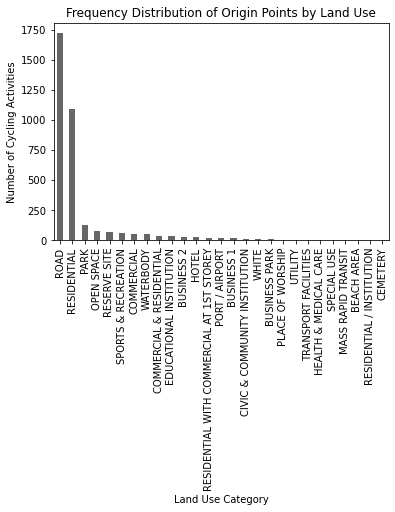

In [75]:
fig = df1['LU_DESC'].value_counts().plot(kind='bar', color=(.4,.4,.4))
#plt.hist(time, 60, color=(.4,.4,.4))
plt.title('Frequency Distribution of Origin Points by Land Use')
plt.xlabel('Land Use Category')
plt.ylabel('Number of Cycling Activities')
#fig.savefig('NEW origins by land use.jpeg', dpi=600)
plt.savefig('NEW origins by land use.jpeg', bbox_inches='tight', dpi=600)

In [77]:
df2=pd.read_csv('destination_landuse.csv')
df2.head()

,OBJECTID,FID_strava_destination_points,mem_point_LineOID,mem_point_Value,STRAVA_MERGE3_OBJECTID,STRAVA_MERGE3_ID,STRAVA_MERGE3_segment_ID,STRAVA_MERGE3_link,STRAVA_MERGE3_date,STRAVA_MERGE3_activity_title,...,LU_DESC,LU_TEXT,GPR,WHI_Q_MX,GPR_B_MN,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng
0,1,3296,3296,22883.910156,3296,3421,470,https://www.strava.com/segment_efforts/2703877...,"Apr 29, 2020",Morning Ride,...,RESIDENTIAL,,EVA,0.0,0.0,93C5B1A37F2A01F6,23/06/2014 0:00:00,27752.8884,24720.6182,403.526776
1,2,3339,3339,102770.757812,3339,3467,477,https://www.strava.com/segment_efforts/2790107...,"May 7, 2016",ANZA Changi 32ish,...,RESIDENTIAL,,EVA,0.0,0.0,C33C2271E41A5C11,23/06/2014 0:00:00,28504.5568,24706.8090,640.650867
2,3,420,420,29755.601562,420,423,61,https://www.strava.com/segment_efforts/4063923...,"Sep 19, 2015",Back from ferry,...,RESIDENTIAL,,EVA,0.0,0.0,C33C2271E41A5C11,23/06/2014 0:00:00,28504.5568,24706.8090,640.650867
3,4,483,483,123208.117188,483,492,70,https://www.strava.com/segment_efforts/2765050...,"Nov 21, 2020",Morning Ride,...,ROAD,,,0.0,0.0,DECF7B30CE5EDD06,23/06/2014 0:00:00,28597.6215,24923.9797,2067.065210
4,5,3500,3500,24382.343750,3500,3637,500,https://www.strava.com/segment_efforts/2690522...,"Apr 29, 2020",Afternoon Ride,...,RESIDENTIAL,,EVA,0.0,0.0,8ECD86F5ABAEE7D2,23/06/2014 0:00:00,28693.8655,24871.9067,621.999813


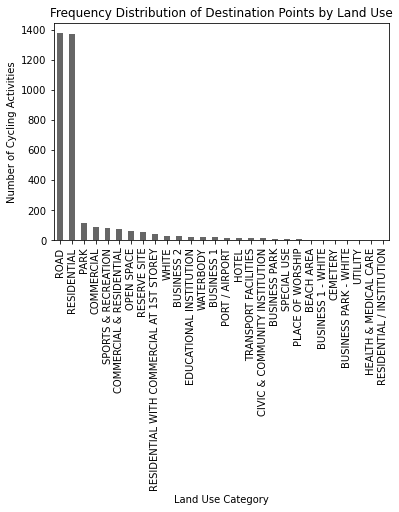

In [78]:
fig = df2['LU_DESC'].value_counts().plot(kind='bar', color=(.4,.4,.4))
plt.title('Frequency Distribution of Destination Points by Land Use')
plt.xlabel('Land Use Category')
plt.ylabel('Number of Cycling Activities')
#fig.savefig('NEW origins by land use.jpeg', dpi=600)
plt.savefig('NEW destinations by land use.jpeg', bbox_inches='tight', dpi=600)

In [15]:
#fig, ax = plt.subplots(1,1)

## Trip characteristics distributions

In [2]:
df = pd.read_csv('strava_corr_dist_1p.csv')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,Length_KM,commute_keywords_csv_ID,commute_keywords,commute_sport,ID_1,dist_error,Shape_Length,ID_12,time_hr,ave_speed
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,16.075227,1,0,NaN,1,0.215845,16075.227323,1,0.601944,26.705500
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,14.208339,2,0,NaN,2,0.129239,14208.338967,2,0.574444,24.734052
2,4,6,1,https://www.strava.com/segment_efforts/5859035114,"Jan 20, 2015",Johor Bahru Cycling,"Tuesday, January 20, 2015",19.55km\r\nDistance\r\n47:53\r\nMoving Time\r\...,0,False,...,19.724203,6,0,NaN,6,0.891063,19724.202789,6,0.798056,24.715325
3,5,7,1,https://www.strava.com/segment_efforts/3606173...,"Mar 9, 2018",Afternoon Ride,"Friday, March 9, 2018",18.61km\r\nDistance\r\n57:36\r\nMoving Time\r\...,0,False,...,18.557019,7,0,NaN,7,0.284692,18557.018771,7,0.960000,19.330228
4,6,8,1,https://www.strava.com/segment_efforts/3055387...,"Oct 19, 2017",Spinning Before Fun ride at Kukop!!,"Thursday, October 19, 2017",15.80km\r\nDistance\r\n39:01\r\nMoving Time\r\...,0,False,...,15.761135,8,0,NaN,8,0.245978,15761.135468,8,0.650278,24.237543


In [76]:
fig = plt.figure()
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

<ipython-input-76-9ae348dddaea>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-76-9ae348dddaea>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure().clear()


<Figure size 432x288 with 0 Axes>

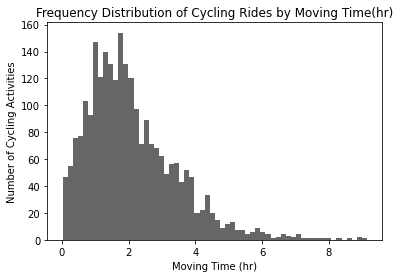

In [31]:
#fig = plt.figure()
#fig, ax = plt.subplots(1,1)
time = np.array(df['time_hr'])

plt.hist(time, 60, color=(.4,.4,.4))
plt.title('Frequency Distribution of Cycling Rides by Moving Time(hr)')
plt.xlabel('Moving Time (hr)')
plt.ylabel('Number of Cycling Activities')
#plt.grid(color=(.9,.9,.9))
#plt.imsave('(NEW CORRECTED)rides by MOVING TIME.jpeg', dpi=600, image, cmap='gray')
fig

In [32]:
fig.savefig('(NEW CORRECTED)rides by MOVING TIME.jpeg', dpi=600)
#plt.imsave(filename, image, cmap='gray')

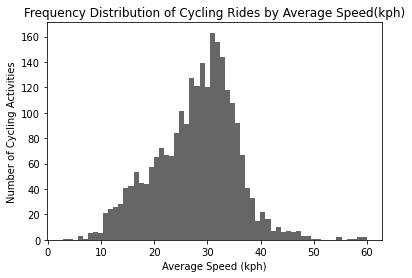

In [34]:
speed = np.array(df['ave_speed'])

plt.hist(speed, 60, color=(.4,.4,.4))
plt.title('Frequency Distribution of Cycling Rides by Average Speed(kph)')
plt.xlabel('Average Speed (kph)')
plt.ylabel('Number of Cycling Activities')
fig

In [35]:
fig.savefig('(NEW CORRECTED)rides by AVE SPEED.jpeg', dpi=600)

In [38]:
length = np.array(df['Length_KM'])
length

array([16.07522732, 14.20833897, 19.72420279, ..., 85.64423168,
       46.59562313, 22.41776888])

<ipython-input-46-244e33d16061>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


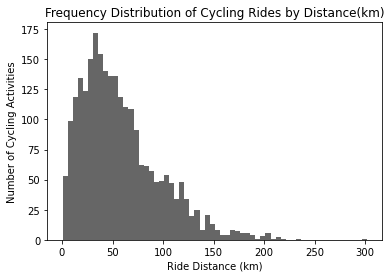

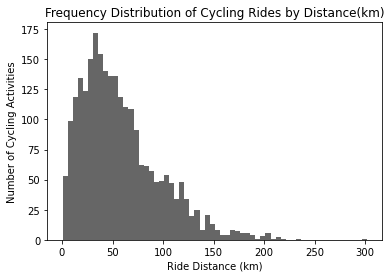

In [46]:
fig, ax = plt.subplots(1,1)
plt.hist(length, 60, color=(.4,.4,.4))
plt.title('Frequency Distribution of Cycling Rides by Distance(km)')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Number of Cycling Activities')
fig

In [47]:
fig.savefig('(NEW CORRECTED)rides by DISTANCE.jpeg', dpi=600)

In [27]:
df.groupby('day_of_week').count()

,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,year,month,day_of_month,distance,moving_time,elev_gain
day_of_week,,,,,,,,,,,,,,,
Friday,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351
Monday,294,294,294,294,294,294,294,294,294,294,294,294,294,294,294
Saturday,893,893,893,893,893,893,893,893,893,893,893,893,893,893,893
Sunday,791,791,791,791,791,791,791,791,791,791,791,791,791,791,791
Thursday,419,419,419,419,419,419,419,419,419,419,419,419,419,419,419
Tuesday,467,467,467,467,467,467,467,467,467,467,467,467,467,467,467
Wednesday,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438


### Origin - Destination data
Differences in euclidean distance of origin and destination was used as an indicator of recreational activity.

In [3]:
origin = pd.read_csv('origin_data.csv')
dest = pd.read_csv('destination_data.csv')

In [5]:
origin

,OBJECTID,mem_point_LineOID,mem_point_Value,STRAVA_MERGE3_OBJECTID,STRAVA_MERGE3_ID,STRAVA_MERGE3_segment_ID,STRAVA_MERGE3_link,STRAVA_MERGE3_date,STRAVA_MERGE3_activity_title,STRAVA_MERGE3_time_data,...,STRAVA_MERGE3_duplicate,STRAVA_MERGE3_day_of_week,STRAVA_MERGE3_year,STRAVA_MERGE3_month,STRAVA_MERGE3_day_of_month,STRAVA_MERGE3_distance,STRAVA_MERGE3_moving_time,STRAVA_MERGE3_elev_gain,X_COORD,Y_COORD
0,1,1,0.0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",...,False,Friday,2018,Feb,9,16.11,36:07:00,111,9571.942383,33752.765625
1,2,2,0.0,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",...,False,Friday,2017,Sep,29,14.19,34:28:00,226,11160.344727,36612.253906
2,3,3,0.0,3,3,1,https://www.strava.com/segment_efforts/3273982...,"Dec 21, 2017",TH BT D,"Thursday, December 21, 2017",...,False,Thursday,2017,Dec,21,42.76,13:32:28,445,13807.214844,35967.117188
3,4,4,0.0,4,4,1,https://www.strava.com/segment_efforts/6984221...,"Oct 20, 2019",Evening Ride,"Sunday, October 20, 2019",...,False,Sunday,2019,Oct,20,17.82,46:23:00,21,13017.541016,36637.574219
4,5,5,0.0,5,5,1,https://www.strava.com/segment_efforts/5736084390,"Dec 18, 2013","PCN & Lor, Sesuai","Wednesday, December 18, 2013",...,False,Wednesday,2013,Dec,18,32.47,1:36:35,515,13026.502930,35678.445312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,3512,3512,0.0,3512,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",...,False,Thursday,2020,Sep,10,44.04,1:39:12,497,29619.029297,25744.328125
3512,3513,3513,0.0,3513,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",...,False,Saturday,2020,Sep,19,85.68,2:41:32,938,28611.925781,30801.794922
3513,3514,3514,0.0,3514,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",...,False,Tuesday,2020,Oct,27,46.28,1:31:37,447,28387.896484,30956.378906
3514,3515,3515,0.0,3515,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",...,False,Wednesday,2020,Sep,9,55.08,2:06:40,260,26536.105469,27594.685547


In [7]:
eucl = pd.DataFrame(columns=['ID','distance'])
eucl['ID']=origin['STRAVA_MERGE3_ID']
eucl['distance']=origin['STRAVA_MERGE3_distance']
eucl.tail()

,ID,distance
3511,3649,44.04
3512,3650,85.68
3513,3651,46.28
3514,3652,55.08
3515,3653,22.45


In [8]:
eucl['O_x']=origin['X_COORD']
eucl['O_y']=origin['Y_COORD']
eucl.tail()

,ID,distance,O_x,O_y
3511,3649,44.04,29619.029297,25744.328125
3512,3650,85.68,28611.925781,30801.794922
3513,3651,46.28,28387.896484,30956.378906
3514,3652,55.08,26536.105469,27594.685547
3515,3653,22.45,28903.191406,25693.238281


In [9]:
dest.tail()

,OBJECTID,mem_point_LineOID,mem_point_Value,STRAVA_MERGE3_OBJECTID,STRAVA_MERGE3_ID,STRAVA_MERGE3_segment_ID,STRAVA_MERGE3_link,STRAVA_MERGE3_date,STRAVA_MERGE3_activity_title,STRAVA_MERGE3_time_data,...,STRAVA_MERGE3_duplicate,STRAVA_MERGE3_day_of_week,STRAVA_MERGE3_year,STRAVA_MERGE3_month,STRAVA_MERGE3_day_of_month,STRAVA_MERGE3_distance,STRAVA_MERGE3_moving_time,STRAVA_MERGE3_elev_gain,X_COORD,Y_COORD
3511,3512,3512,43923.199219,3512,3649,502,https://www.strava.com/segment_efforts/2740814...,"Sep 10, 2020",Sentosa Mix,"Thursday, September 10, 2020",...,False,Thursday,2020,Sep,10,44.04,1:39:12,497,28978.759766,25606.769531
3512,3513,3513,85644.234375,3513,3650,502,https://www.strava.com/segment_efforts/2742194...,"Sep 19, 2020",Morning Ride,"Saturday, September 19, 2020",...,False,Saturday,2020,Sep,19,85.68,2:41:32,938,28475.150391,30261.636719
3513,3514,3514,46595.625000,3514,3651,502,https://www.strava.com/segment_efforts/2756015...,"Oct 27, 2020",Morning Ride,"Tuesday, October 27, 2020",...,False,Tuesday,2020,Oct,27,46.28,1:31:37,447,28369.087891,31159.283203
3514,3515,3515,56238.605469,3515,3652,502,https://www.strava.com/segment_efforts/2740814...,"Sep 9, 2020",C&C10 blast and ECP balade,"Wednesday, September 9, 2020",...,False,Wednesday,2020,Sep,9,55.08,2:06:40,260,25868.681641,27402.732422
3515,3516,3516,22417.769531,3516,3653,502,https://www.strava.com/segment_efforts/2759572...,"Nov 6, 2020",Morning Ride,"Friday, November 6, 2020",...,False,Friday,2020,Nov,6,22.45,42:19:00,230,29023.722656,25545.843750


In [10]:
eucl['D_x']=dest['X_COORD']
eucl['D_y']=dest['Y_COORD']
eucl.tail()

,ID,distance,O_x,O_y,D_x,D_y
3511,3649,44.04,29619.029297,25744.328125,28978.759766,25606.769531
3512,3650,85.68,28611.925781,30801.794922,28475.150391,30261.636719
3513,3651,46.28,28387.896484,30956.378906,28369.087891,31159.283203
3514,3652,55.08,26536.105469,27594.685547,25868.681641,27402.732422
3515,3653,22.45,28903.191406,25693.238281,29023.722656,25545.843750


In [16]:
x1 = eucl['O_x']
x2 = eucl['D_x']
y1 = eucl['O_y']
y2 = eucl['D_y']

In [17]:
eucl['euclidean_distance'] = np.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2))
eucl.tail()

,ID,distance,O_x,O_y,D_x,D_y,euclidean_distance
3511,3649,44.04,29619.029297,25744.328125,28978.759766,25606.769531,654.879714
3512,3650,85.68,28611.925781,30801.794922,28475.150391,30261.636719,557.205879
3513,3651,46.28,28387.896484,30956.378906,28369.087891,31159.283203,203.774181
3514,3652,55.08,26536.105469,27594.685547,25868.681641,27402.732422,694.478631
3515,3653,22.45,28903.191406,25693.238281,29023.722656,25545.843750,190.402022


In [21]:
eucl['distance(km)'] = eucl['distance']*1000
eucl.tail()

,ID,distance,O_x,O_y,D_x,D_y,euclidean_distance,distance(km)
3511,3649,44.04,29619.029297,25744.328125,28978.759766,25606.769531,654.879714,44040.0
3512,3650,85.68,28611.925781,30801.794922,28475.150391,30261.636719,557.205879,85680.0
3513,3651,46.28,28387.896484,30956.378906,28369.087891,31159.283203,203.774181,46280.0
3514,3652,55.08,26536.105469,27594.685547,25868.681641,27402.732422,694.478631,55080.0
3515,3653,22.45,28903.191406,25693.238281,29023.722656,25545.843750,190.402022,22450.0


In [22]:
eucl['eucl_percentage'] = (eucl['euclidean_distance'] / eucl['distance(km)'])*100
eucl.tail()

,ID,distance,O_x,O_y,D_x,D_y,euclidean_distance,distance(km),eucl_percentage
3511,3649,44.04,29619.029297,25744.328125,28978.759766,25606.769531,654.879714,44040.0,1.487011
3512,3650,85.68,28611.925781,30801.794922,28475.150391,30261.636719,557.205879,85680.0,0.650334
3513,3651,46.28,28387.896484,30956.378906,28369.087891,31159.283203,203.774181,46280.0,0.440307
3514,3652,55.08,26536.105469,27594.685547,25868.681641,27402.732422,694.478631,55080.0,1.260854
3515,3653,22.45,28903.191406,25693.238281,29023.722656,25545.843750,190.402022,22450.0,0.848116


In [23]:
eucl.to_csv('OD_euclidean_dist.csv')

In [2]:
df = pd.read_csv('OD_euclidean_dist.csv')
df.head()

,Unnamed: 0,ID,distance,O_x,O_y,D_x,D_y,euclidean_distance,distance(km),eucl_percentage
0,0,1,16.11,9571.942383,33752.765625,18397.148438,39824.546875,10712.179491,16110.0,66.493976
1,1,2,14.19,11160.344727,36612.253906,19227.031250,33283.785156,8726.404511,14190.0,61.496861
2,2,3,42.76,13807.214844,35967.117188,13763.922852,35974.085938,43.849288,42760.0,0.102547
3,3,4,17.82,13017.541016,36637.574219,13277.413086,36853.074219,337.599975,17820.0,1.894500
4,4,5,32.47,13026.502930,35678.445312,12978.423828,35635.878906,64.214476,32470.0,0.197766


In [6]:
df['eucl_percentage'].describe()

count    3516.000000
mean        9.629128
std        20.460163
min         0.001479
25%         0.114489
50%         0.617883
75%         6.688747
max       313.737145
Name: eucl_percentage, dtype: float64

In [4]:
length = np.array(df['eucl_percentage'])

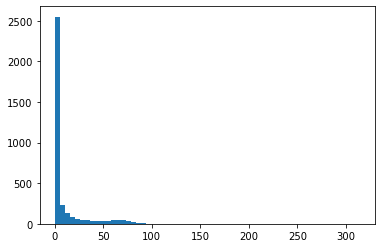

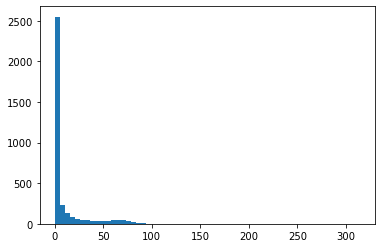

In [5]:
fig, ax = plt.subplots(1,1)
plt.hist(length, 60)
#plt.title('Frequency Distribution of O-D ')
#plt.xlabel('Euclidean Distance')
#plt.ylabel('Number of Cycling Activities')
fig

## Utilisation percentage
This part analyzes the percentage of ride distance within the urban street network and cycling infrastructure network (cycle paths and PCNs) based on analyzed data results from ArcGIS processing.

#### Street Infra intersect

In [2]:
df = pd.read_csv('street_intersect.csv')
df.head()

,OBJECTID,FID_urbanstreet_10m_buffer,Id,FID_strava_2020_21_ID,ID_1,Shape_Length
0,1,0,0,1324,3373,586.452788
1,2,0,0,1368,3508,2435.783960
2,3,0,0,1183,3010,0.223781
3,4,0,0,22,69,1657.169610
4,5,0,0,131,337,5877.757567


In [4]:
ID_array=df.groupby('ID_1')['ID_1'].unique()
ID_list = []
for ID in ID_array:
    ID_list.append(ID[0])
#ID_list[1]

In [5]:
df_sum = df.groupby('ID_1').sum()
st = np.array(df_sum['Shape_Length'])
st[0]
#df_sum['Shape_Length']

47423.310594167764

In [6]:
df_util = pd.DataFrame(columns=['ID'])
df_util['ID'] = ID_list
df_util['street_m'] = st
df_util.head()

,ID,street_m
0,12,47423.310594
1,23,57092.147242
2,24,39478.996588
3,26,16927.341461
4,27,55561.437167


In [7]:
df_util.to_csv('street_dist.csv')

In [8]:
len(df_util)

1420

#### cycling infra intersect

In [2]:
df = pd.read_csv('cycl_infra_intersect.csv')
df.head()

,OBJECTID,FID_strava_2020_21_ID,ID,FID_cycling_infra_10mbuffer,Shape_Length
0,1,228,560,1,2098.846036
1,2,523,1330,1,488.317029
2,3,981,2516,1,70.594769
3,4,209,522,1,12981.769898
4,5,210,523,1,5891.707859


In [16]:
ID_array=df.groupby('ID')['ID'].unique()
ID_list = []
for ID in ID_array:
    ID_list.append(ID[0])
#ID_list[1]

23

In [12]:
df['ID'].unique()

array([ 560, 1330, 2516, ..., 3490,  599, 3547], dtype=int64)

In [17]:
df_sum = df.groupby('ID').sum()
cyc = np.array(df_sum['Shape_Length'])
cyc[0]
#df_sum['Shape_Length']

739.3579256987508

In [19]:
df_util = pd.DataFrame(columns=['ID'])
df_util['ID'] = ID_list
df_util['cycle_infra_m'] = cyc
df_util.head()

,ID,cycle_infra_m
0,12,739.357926
1,23,5646.224151
2,26,717.652251
3,27,11215.740245
4,29,293.836693


In [20]:
df_util.to_csv('cycle_infra_dist.csv')

#### Utilization results

In [10]:
df=pd.read_csv('util_percent.csv')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,commute_keywords,commute_sport,Shape_Length,cycle_infra_percentage,street_percentage,util_total,cycle_m,Field1,ID_12,street_m
0,1,12,2,https://www.strava.com/segment_efforts/2713558...,"Jul 2, 2020",Southern hills with 1 big push,"Thursday, July 2, 2020",63.79km\r\nDistance\r\n2:05:22\r\nMoving Time\...,0,False,...,0,NaN,62088.970199,1.190804,76.379606,77.570410,739.357926,0.0,12.0,47423.310594
1,2,23,5,https://www.strava.com/segment_efforts/2779239...,"Dec 30, 2020",Rapha500 ride #3 Infinity loop Grandfondo #wif...,"Wednesday, December 30, 2020",102.70km\r\nDistance\r\n3:32:53\r\nMoving Time...,0,False,...,0,NaN,102656.872382,5.500094,55.614540,61.114634,5646.224151,1.0,23.0,57092.147242
2,3,24,5,https://www.strava.com/segment_efforts/2689197...,"Apr 26, 2020",Morning Ride to Bukit Timah neighbourhood,"Sunday, April 26, 2020",45.14km\r\nDistance\r\n1:33:13\r\nMoving Time\...,0,False,...,0,NaN,45266.583381,NaN,87.214439,NaN,NaN,2.0,24.0,39478.996588
3,4,26,5,https://www.strava.com/segment_efforts/7802932...,"Mar 1, 2020",Morning Ride,"Sunday, March 1, 2020",23.67km\r\nDistance\r\n1:04:48\r\nMoving Time\...,0,False,...,0,NaN,23836.312634,3.010752,71.014933,74.025685,717.652251,3.0,26.0,16927.341461
4,5,27,5,https://www.strava.com/segment_efforts/2779018...,"Dec 29, 2020",RTI(Round the Island),"Tuesday, December 29, 2020",114.33km\r\nDistance\r\n4:25:22\r\nMoving Time...,0,False,...,0,NaN,115841.731396,9.681951,47.963231,57.645182,11215.740245,4.0,27.0,55561.437167


In [11]:
df=df.fillna(0)

In [14]:
df.columns

Index(['OBJECTID', 'ID', 'segment_ID', 'link', 'date', 'activity_title',
       'time_data', 'trip_data', 'commute', 'duplicate', 'day_of_week', 'year',
       'month', 'day_of_month', 'distance', 'moving_time', 'elev_gain',
       'Length_KM', 'ID_1', 'commute_keywords', 'commute_sport',
       'Shape_Length', 'cycle_infra_percentage', 'street_percentage',
       'util_total', 'cycle_m', 'Field1', 'ID_12', 'street_m'],
      dtype='object')

In [12]:
df['street_m'].describe()

count      1429.000000
mean      26175.933480
std       25518.789576
min           0.000000
25%        6873.460448
50%       17969.472226
75%       37996.841717
max      178797.414683
Name: street_m, dtype: float64

In [15]:
df['cycle_m'].describe()

count     1429.000000
mean      6615.554600
std       8084.398466
min          0.000000
25%        666.346774
50%       3496.762863
75%       9725.373035
max      51183.703967
Name: cycle_m, dtype: float64

In [17]:
df['street_percentage'].describe()

count    1429.000000
mean       45.761792
std        24.835254
min         0.000000
25%        25.077608
50%        47.952867
75%        66.130327
max        99.808745
Name: street_percentage, dtype: float64

In [ ]:
df['cycle_infra_percentage'].describe()

In [13]:
df.to_csv('util_percent_UPDATED.csv')

### Bike infra density km/plnarea
Density of cycling infrastructure lines for each Singapore planning area

In [2]:
df = pd.read_csv('plna_areas.csv')
df.head()

,FID,OBJECTID,PLN_AREA_N,PLN_AREA_C,CA_IND,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,0,1,BISHAN,BS,N,CENTRAL REGION,CR,BA616285F402846F,05/12/2014 0:00:00,28789.7630,37450.8865,13517.121556,7.618921e+06
1,1,2,BUKIT BATOK,BK,N,WEST REGION,WR,FB44C870B04B7F57,05/12/2014 0:00:00,19255.4150,37527.6527,15234.223423,1.113326e+07
2,2,3,BUKIT MERAH,BM,N,CENTRAL REGION,CR,738B479882E4EE28,05/12/2014 0:00:00,26865.7838,28662.8732,29156.293788,1.446247e+07
3,3,4,BUKIT PANJANG,BP,N,WEST REGION,WR,4A9C6E6BAF7BE998,05/12/2014 0:00:00,21287.0436,38761.8448,15891.853279,9.019940e+06
4,4,5,BUKIT TIMAH,BT,N,CENTRAL REGION,CR,C893AEAD20F42559,05/12/2014 0:00:00,23256.7643,34689.0037,22492.840844,1.752665e+07


In [3]:
plna = pd.DataFrame(columns=['plnarea','area'])

In [4]:
plna['plnarea'] = df['PLN_AREA_N']
plna['area'] = df['SHAPE_Area']

In [12]:
plna.head()

,plnarea,area
0,BISHAN,7.618921e+06
1,BUKIT BATOK,1.113326e+07
2,BUKIT MERAH,1.446247e+07
3,BUKIT PANJANG,9.019940e+06
4,BUKIT TIMAH,1.752665e+07


In [5]:
curr = pd.read_csv('plna_cyclinginfra_current.csv')
plan = pd.read_csv('plna_cyclinginfra_planned.csv')

In [7]:
curr.columns

Index(['OBJECTID', 'FID_cycling_infra_merge', 'Name', 'descriptio',
       'timestamp', 'begin', 'end', 'altitudeMo', 'tessellate', 'extrude',
       'visibility', 'drawOrder', 'icon', 'CYL_PATH', 'AGENCY_MAI', 'INC_CRC',
       'FMEL_UPD_D', 'snippet', 'PARK', 'PCN_LOOP', 'MORE_INFO',
       'FID_MP14_PLNG_AREA_WEB_PL', 'OBJECTID_1', 'PLN_AREA_N', 'PLN_AREA_C',
       'CA_IND', 'REGION_N', 'REGION_C', 'INC_CRC_1', 'FMEL_UPD_D_1', 'X_ADDR',
       'Y_ADDR', 'SHAPE_Leng', 'Shape_Length'],
      dtype='object')

In [22]:
#curr.groupby('PLN_AREA_N')['PLN_AREA_N']
plna_array=plan.groupby('PLN_AREA_N')['PLN_AREA_N']
plna_list = []
for pln in plna_array:
    plna_list.append(pln[0])

In [23]:
plan_area = plan.groupby('PLN_AREA_N').sum()
#df_curr = pd.DataFrame(columns=['plnarea','current_length'])
#df_curr
df_plan = pd.DataFrame({ 'plnarea': plna_list, 
                        'planned_length': plan_area['Shape_Length'] } )
df_plan.head()

,plnarea,planned_length
PLN_AREA_N,,
ANG MO KIO,ANG MO KIO,17921.497837
BEDOK,BEDOK,57910.691663
BISHAN,BISHAN,10136.827029
BOON LAY,BOON LAY,5075.364647
BUKIT BATOK,BUKIT BATOK,16381.227458


In [24]:
plna = pd.merge(plna, df_plan, on='plnarea', how='left')
plna.head()

,plnarea,area,current_length,planned_length
0,BISHAN,7.618921e+06,6004.771406,10136.827029
1,BUKIT BATOK,1.113326e+07,12146.235292,16381.227458
2,BUKIT MERAH,1.446247e+07,6714.402342,20384.901067
3,BUKIT PANJANG,9.019940e+06,11619.960143,17781.309274
4,BUKIT TIMAH,1.752665e+07,76.629253,19253.342813


In [25]:
plna=plna.fillna(0)

In [28]:
plna['current_density'] = (plna['current_length']/1000) / (plna['area']/1000000)
plna['planned_density'] = (plna['planned_length']/1000) / (plna['area']/1000000)
plna.head()

,plnarea,area,current_length,planned_length,current_density,planned_density
0,BISHAN,7.618921e+06,6004.771406,10136.827029,0.788139,1.330481
1,BUKIT BATOK,1.113326e+07,12146.235292,16381.227458,1.090987,1.471378
2,BUKIT MERAH,1.446247e+07,6714.402342,20384.901067,0.464264,1.409503
3,BUKIT PANJANG,9.019940e+06,11619.960143,17781.309274,1.288253,1.971333
4,BUKIT TIMAH,1.752665e+07,76.629253,19253.342813,0.004372,1.098518


In [29]:
plna.to_csv('bikeway density by plnarea.csv')

# data verification

In [3]:
df = pd.read_csv('strava_corr_dist_1p.csv')
df.head()

,OBJECTID,ID,segment_ID,link,date,activity_title,time_data,trip_data,commute,duplicate,...,Length_KM,commute_keywords_csv_ID,commute_keywords,commute_sport,ID_1,dist_error,Shape_Length,ID_12,time_hr,ave_speed
0,1,1,1,https://www.strava.com/segment_efforts/3472297...,"Feb 9, 2018",Afternoon Ride,"Friday, February 9, 2018",16.11km\r\nDistance\r\n36:07\r\nMoving Time\r\...,0,False,...,16.075227,1,0,NaN,1,0.215845,16075.227323,1,0.601944,26.705500
1,2,2,1,https://www.strava.com/segment_efforts/2974290...,"Sep 29, 2017",Sortie à vélo en soirée,"Friday, September 29, 2017",14.19km\r\nDistance\r\n34:28\r\nMoving Time\r\...,0,False,...,14.208339,2,0,NaN,2,0.129239,14208.338967,2,0.574444,24.734052
2,4,6,1,https://www.strava.com/segment_efforts/5859035114,"Jan 20, 2015",Johor Bahru Cycling,"Tuesday, January 20, 2015",19.55km\r\nDistance\r\n47:53\r\nMoving Time\r\...,0,False,...,19.724203,6,0,NaN,6,0.891063,19724.202789,6,0.798056,24.715325
3,5,7,1,https://www.strava.com/segment_efforts/3606173...,"Mar 9, 2018",Afternoon Ride,"Friday, March 9, 2018",18.61km\r\nDistance\r\n57:36\r\nMoving Time\r\...,0,False,...,18.557019,7,0,NaN,7,0.284692,18557.018771,7,0.960000,19.330228
4,6,8,1,https://www.strava.com/segment_efforts/3055387...,"Oct 19, 2017",Spinning Before Fun ride at Kukop!!,"Thursday, October 19, 2017",15.80km\r\nDistance\r\n39:01\r\nMoving Time\r\...,0,False,...,15.761135,8,0,NaN,8,0.245978,15761.135468,8,0.650278,24.237543


In [4]:
df.columns

Index(['OBJECTID', 'ID', 'segment_ID', 'link', 'date', 'activity_title',
       'time_data', 'trip_data', 'commute', 'duplicate', 'day_of_week', 'year',
       'month', 'day_of_month', 'distance', 'moving_time', 'elev_gain',
       'Length_KM', 'commute_keywords_csv_ID', 'commute_keywords',
       'commute_sport', 'ID_1', 'dist_error', 'Shape_Length', 'ID_12',
       'time_hr', 'ave_speed'],
      dtype='object')

In [6]:
df.describe()

,OBJECTID,ID,segment_ID,commute,year,day_of_month,distance,elev_gain,Length_KM,commute_keywords_csv_ID,commute_keywords,commute_sport,ID_1,dist_error,Shape_Length,ID_12,time_hr,ave_speed
count,2490.000000,2490.000000,2490.000000,2490.0,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2.0,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000,2490.000000
mean,1253.839759,1828.442169,254.507631,0.0,2017.622490,15.675904,57.608301,354.117671,57.646567,1828.442169,0.005221,1.0,1828.442169,0.322661,57646.567082,1828.442169,2.092209,27.925276
std,723.009939,1050.806297,143.462209,0.0,2.752196,8.914068,39.334786,403.830417,39.375205,1050.806297,0.072081,0.0,1050.806297,0.236370,39375.204806,1050.806297,1.344557,7.630918
min,1.000000,1.000000,1.000000,0.0,2007.000000,1.000000,0.500000,0.000000,0.497986,1.000000,0.000000,1.0,1.000000,0.000073,497.985576,1.000000,0.024444,2.756362
25%,627.250000,932.500000,134.250000,0.0,2016.000000,8.000000,28.682500,129.000000,28.686797,932.500000,0.000000,1.0,932.500000,0.143722,28686.797312,932.500000,1.118472,23.067096
50%,1253.500000,1832.500000,255.500000,0.0,2018.000000,16.000000,49.710000,276.000000,49.745177,1832.500000,0.000000,1.0,1832.500000,0.280613,49745.176626,1832.500000,1.821250,28.933694
75%,1879.750000,2711.750000,378.000000,0.0,2020.000000,24.000000,77.505000,468.000000,77.550505,2711.750000,0.000000,1.0,2711.750000,0.435675,77550.505006,2711.750000,2.816319,33.006996
max,2506.000000,3653.000000,502.000000,0.0,2021.000000,31.000000,300.450000,13567.000000,301.769103,3653.000000,1.000000,1.0,3653.000000,0.996612,301769.103100,3653.000000,9.140000,60.019062
